### Loading of Libraries

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

### Data Acquisiton (Displaying of house dataset) 

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train,test],ignore_index = True)

In [ ]:
#Printing Dimension of datasets
print("Dimension of train dataset", train.shape)
print("Dimension of test dataset", test.shape)
print("Dimension of data dataset", data.shape)

Dimension of train dataset (1460, 81)
Dimension of test dataset (1459, 80)
Dimension of data dataset (2919, 81)


In [ ]:
# Showing overview of the train dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Showing overview of the test dataset
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Showing overview of the Final dataset
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
# Extracting dataframe for only 'number' datatypes
df = data.select_dtypes(include=['float64','int64'])
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [ ]:
# Showing datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   OverallQual    2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   YearBuilt      2919 non-null   int64  
 7   YearRemodAdd   2919 non-null   int64  
 8   MasVnrArea     2896 non-null   float64
 9   BsmtFinSF1     2918 non-null   float64
 10  BsmtFinSF2     2918 non-null   float64
 11  BsmtUnfSF      2918 non-null   float64
 12  TotalBsmtSF    2918 non-null   float64
 13  1stFlrSF       2919 non-null   int64  
 14  2ndFlrSF       2919 non-null   int64  
 15  LowQualFinSF   2919 non-null   int64  
 16  GrLivArea      2919 non-null   int64  
 17  BsmtFullBath   2917 non-null   float64
 18  BsmtHalf

In [ ]:
# getting discriptive statistcs on "number" datatypes
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Missing values

In [ ]:
#Identifing missing Values
miss_val = df.isna().sum()
miss_val

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [ ]:
# Identifing missing Values > 0 and sorting them by ascending order
miss_val[miss_val>0].sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64

In [ ]:
columns = ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtHalfBath','BsmtFullBath','GarageArea','GarageCars','TotalBsmtSF',\
                'BsmtUnfSF','BsmtFinSF2','BsmtFinSF1']
for column in columns:
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
df.isna().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [ ]:
# Showing overview of the train dataset after imputing missing values
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [ ]:
#Spliting dataframe into train and test by manually as intially we have two dataframes train and test.
df_train = df[:1460]
df_test = df[1460:]

In [ ]:
#Constructing correlation Matrix
data_corr = df_train.corr()
data_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009828,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050212,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356828,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022905,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009828,-0.356828,1.000000,0.305194,0.234641,-0.053148,0.116955,0.083176,0.179112,0.214800,...,0.076000,0.137147,0.010143,0.062061,0.037665,0.180839,0.000159,0.010366,0.006494,0.334820
LotArea,-0.033226,-0.139781,0.305194,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103952,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234641,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410200,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053148,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127760,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116955,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314704,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083176,0.013788,0.550684,0.073741,0.592855,1.000000,0.179151,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050212,0.022905,0.179112,0.103952,0.410200,-0.127760,0.314704,0.179151,1.000000,0.263552,...,0.159361,0.124932,-0.109851,0.018800,0.061465,0.011726,-0.029811,-0.005951,-0.008186,0.475210
BsmtFinSF1,-0.005024,-0.069836,0.214800,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263552,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [ ]:
#considering only the features which have absolute correlation value greater tha 0.60

data_corr = data_corr['SalePrice'][:-1]
data_corr[abs(data_corr)>=0.60].sort_values(ascending=False)

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

In [ ]:
# df_test.drop(['SalePrice'],axis = 1, inplace = True)
df_train = df_train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','SalePrice']]
df_test = df_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']]

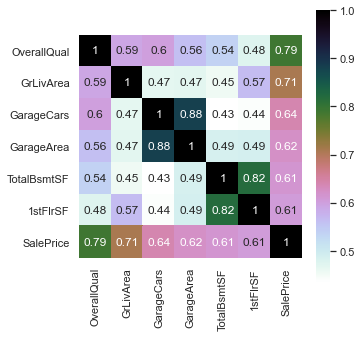

In [ ]:
corr = df_train.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df_train, test_size=0.25)

In [ ]:
#considering only the highly correlated features for training and validation
train_x = train.drop(['SalePrice'], axis = 1)
train_y = train['SalePrice']             # output of the training data

val_x = val.drop(['SalePrice'], axis = 1)
val_y = val['SalePrice'] 

In [ ]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (1095, 6)
Dimension of train_y dataframe: (1095,)
Dimension of val_x dataframe: (365, 6)
Dimension of val_y dataframe: (365,)


# Linear Regression

Linear Regression is one of the most fundamental algorithms in the Machine Learning world. It is the door to the magical world ahead. But before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements.

## What is Regression Analysis?

Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:

Discreet/continuous independent variables

A best-fit regression line

Continuous dependent variable. i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables. The equation of the Linear Regression is:

 $$ Y = a + b*X + e$$ 

Where, a is the intercept, b is the slope of the line, and e is the error term. The equation above is used to predict the value of the target variable based on the given predictor variable(s).

In [ ]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 24816.314135206685
Mean Square Error of linear regression: 1384761023.5427134
R_Squared Score of linear regression: 0.7177012367245068


In [ ]:
predic_test = ln_reg.predict(df_test)

In [ ]:
#final prediction on test data
predic_test = ln_reg.predict(df_test)

#Create Sample Submission file 
submission_data = pd.DataFrame({'Id':test.Id,'Pred_SalePrice':predic_test})
submission_data
val_y = pd.DataFrame(val_y)
val_y['Predicted'] = submission_data['Pred_SalePrice']

val_y


,SalePrice,Predicted
870,109500.0,322914.023619
648,155000.0,93640.191587
1176,119500.0,185273.266002
1103,159500.0,204402.356926
44,141000.0,220018.644393
...,...,...
296,152000.0,102402.832856
24,154000.0,177557.892014
538,158000.0,233825.002769
1110,188000.0,167434.410645


##  Ridge(L2) Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [ ]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

## Lasso(L1) Regression

In [ ]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

In [ ]:
lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

In [ ]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)